In [ ]:
import pandas as pd

# Membaca dataset cuaca dalam format CSV
data = pd.read_csv('/content/seattle-weather.csv')

# Menampilkan nama kolom untuk mengetahui struktur dataset
print("Nama Kolom: ", data.columns)

# Mengganti nilai 'rain' menjadi 1 dan 'sun' menjadi 0 di kolom 'weather'
data['weather'] = data['weather'].replace({'rain': 1, 'sun': 0})

# Filter baris yang memiliki nilai 1 atau 0 pada kolom 'weather'
filtered_data = data[data['weather'].isin([1, 0])]

# Menampilkan hasil
print(filtered_data.head())  # Menampilkan 5 baris pertama yang sesuai

# Menyimpan hasil filter ke dalam file CSV baru
filtered_data.to_csv('/content/filtered_weather.csv', index=False)


Nama Kolom:  Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
         date  precipitation  temp_max  temp_min  wind weather
1  2012-01-02           10.9      10.6       2.8   4.5       1
2  2012-01-03            0.8      11.7       7.2   2.3       1
3  2012-01-04           20.3      12.2       5.6   4.7       1
4  2012-01-05            1.3       8.9       2.8   6.1       1
5  2012-01-06            2.5       4.4       2.2   2.2       1


In [ ]:
import pandas as pd                                                        #for data manipulation
import numpy as np                                                         #for numerical operations
from matplotlib import pyplot as plt                                       #for visualization
import seaborn as sns                                                      #for visualization
from sklearn.ensemble import RandomForestClassifier                        #for using Random forest Classifier algorithm
from sklearn.metrics import accuracy_score                                 #for accouracy

df = pd.read_csv('/content/filtered_weather.csv') #Read a CSV file by given path
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-02,10.9,10.6,2.8,4.5,1
1,2012-01-03,0.8,11.7,7.2,2.3,1
2,2012-01-04,20.3,12.2,5.6,4.7,1
3,2012-01-05,1.3,8.9,2.8,6.1,1
4,2012-01-06,2.5,4.4,2.2,2.2,1
...,...,...,...,...,...,...
1276,2015-12-26,0.0,4.4,0.0,2.5,0
1277,2015-12-27,8.6,4.4,1.7,2.9,1
1278,2015-12-28,1.5,5.0,1.7,1.3,1
1279,2015-12-30,0.0,5.6,-1.0,3.4,0


In [ ]:
print('Total number of records: ',len(df))                # For checking number of records

Total number of records:  1281


In [ ]:
print("Parameter are: ",df.columns)                     #For printing coloumn names

Parameter are:  Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind,weather
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,3.281499,16.655738,8.465574,3.313427,0.500390
std,6.939005,7.226486,4.870935,1.435877,0.500195
min,0.000000,-1.600000,-7.100000,0.400000,0.000000
25%,0.000000,11.100000,5.000000,2.300000,0.000000
50%,0.000000,15.600000,8.300000,3.000000,1.000000
75%,3.300000,22.200000,12.200000,4.100000,1.000000
max,55.900000,35.600000,18.300000,9.500000,1.000000


In [ ]:
df = df.drop(columns=['date'])
df

,precipitation,temp_max,temp_min,wind,weather
0,10.9,10.6,2.8,4.5,1
1,0.8,11.7,7.2,2.3,1
2,20.3,12.2,5.6,4.7,1
3,1.3,8.9,2.8,6.1,1
4,2.5,4.4,2.2,2.2,1
...,...,...,...,...,...
1276,0.0,4.4,0.0,2.5,0
1277,8.6,4.4,1.7,2.9,1
1278,1.5,5.0,1.7,1.3,1
1279,0.0,5.6,-1.0,3.4,0


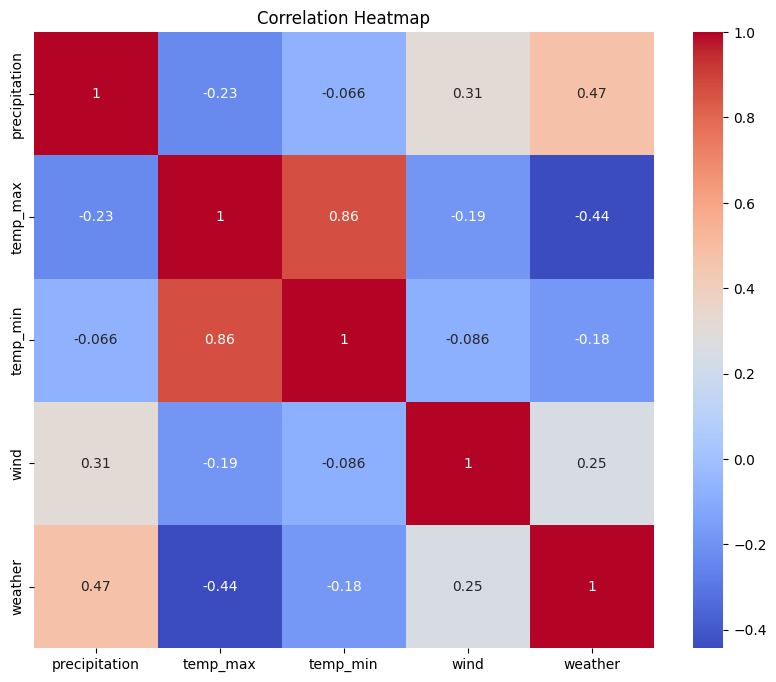

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Preprocessing

In [ ]:
df.isnull().values.any()

False

In [ ]:
true_count= len(df.loc[df['weather']==True])
False_count= len(df.loc[df['weather']==False])
(true_count,False_count)

(641, 640)

In [ ]:
df.corr()['weather'].sort_values()

,weather
temp_max,-0.443492
temp_min,-0.180219
wind,0.248546
precipitation,0.472722
weather,1.000000


Data splitting

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
Y = df['weather']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Model Selection and Training

In [ ]:
n_estimators = 10
base_models = []

In [ ]:
for i in range(n_estimators):
    rf = RandomForestClassifier(n_estimators=200)
    rf.fit(X_train, Y_train)
    base_models.append(rf)

Testing dan Evaluasi

In [ ]:
predictions = [model.predict(X_test) for model in base_models]

NameError: name 'base_models' is not defined

In [ ]:
ensemble_predictions = np.round(np.mean(predictions, axis=0))

In [ ]:
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy}")

Ensemble Accuracy: 0.9610894941634242


In [ ]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(Y_test, ensemble_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[130   2]
 [  8 117]]


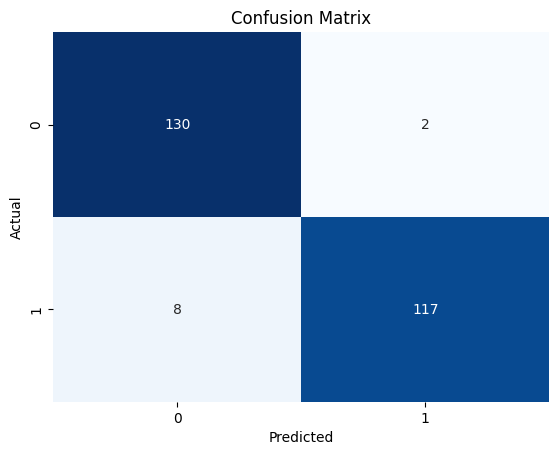

In [ ]:
cm = confusion_matrix(Y_test, ensemble_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd

# Get input from the user
user_input = {
    'precipitation': float(input('Enter Precipitation level: ')),
    'temp_max': float(input('Enter Maximum Temperature (Temp_Max): ')),
    'temp_min': float(input('Enter Minimum Temperature (Temp_Min): ')),
    'wind': float(input('Enter Wind speed: '))
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
user_prediction = rf.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "sun"
else:
    result = "rain"

print(f"The model predicts: {result}")

Enter Precipitation level: 2.5
Enter Maximum Temperature (Temp_Max): 0.3
Enter Minimum Temperature (Temp_Min): 1.4
Enter Wind speed: 2.4
The model predicts: rain
